### Homework 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Weather-check survey

In [2]:
data = pd.read_csv('C:/Users/Taguhi/Desktop/Data S.B. materials/Data vis/Homework3/Data.csv')
data

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
...,...,...,...,...,...,...,...,...,...
923,3877568054,Yes,The Weather Channel,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
924,3877568053,Yes,The default weather app on your phone,-,Very likely,30 - 44,Female,Prefer not to answer,South Atlantic
925,3877566926,Yes,Local TV News,-,Somewhat likely,60+,Female,Prefer not to answer,Pacific
926,3877551536,No,-,-,-,-,-,-,-


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                        --------------  ----- 
 0   RespondentID                                                                                                                                  928 non-null    int64 
 1   Do you typically check a daily weather report?                                                                                                928 non-null    object
 2   How do you typically check the weather?                                                                                                       928 non-null    object
 3   A specific website or app (please provide

### Changing names and types of some columns

In [4]:
data['RespondentID'] = data.RespondentID.astype('O')
data.rename(columns = {'Do you typically check a daily weather report?':'checking_weather',
                       'A specific website or app (please provide the answer)':'specific_app',
                       'How do you typically check the weather?':'way_of_checking',
                       'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?':'checking_by_smartwatch',
                       'What is your gender?':'gender',
                       'How much total combined money did all members of your HOUSEHOLD earn last year?':'household_earning',
                      },
                       inplace = True
                      )

### Droping rows with missing values from checking by smartwatch column

In [5]:
data = data[~data['checking_by_smartwatch'].str.contains(r'-')]  

In [6]:
data.describe(include = "O")

,RespondentID,checking_weather,way_of_checking,specific_app,checking_by_smartwatch,Age,gender,household_earning,US Region
count,917,917,917,917,917,917,917,917,917
unique,917,2,8,122,4,4,3,12,10
top,3879934990,Yes,The default weather app on your phone,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
freq,1,740,213,742,362,278,527,169,185


## Checking the weather with smartwatches in different age groups 

In [7]:
df = data.groupby(['Age','checking_by_smartwatch'])['checking_by_smartwatch'].count().unstack().reset_index()

In [8]:
df1 = df[df.columns[1:]].apply(lambda x: x*100/sum(x), axis=1)
df1

checking_by_smartwatch,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
0,35.028249,6.214689,38.418079,20.338983
1,33.333333,6.862745,34.803922,25.000000
2,26.258993,7.194245,46.043165,20.503597
3,27.519380,10.852713,36.821705,24.806202


### Object Oriented Interface

####  Chart 1: each row sums up to 100%

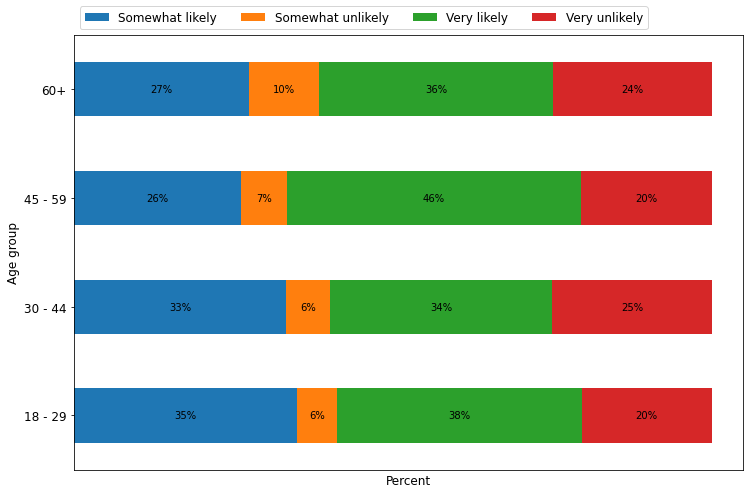

In [9]:
ax = df1.plot.barh(stacked=True,figsize=(12, 8)) 
ax.set_ylabel('Age group',fontsize = 12)
ax.set_xlabel('Percent',fontsize = 12)
ax.set_xticks([])
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(int(width))+ '%', xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')
ax.set_yticks(np.arange(4))
ax.set_yticklabels(['18 - 29','30 - 44','45 - 59', '60+'], fontsize = 12)
ax.legend(ncol=len(df), bbox_to_anchor=(0, 1),loc='lower left', fontsize=12) ;

#### Chart 2: absolute values, that do not sum up to 100%

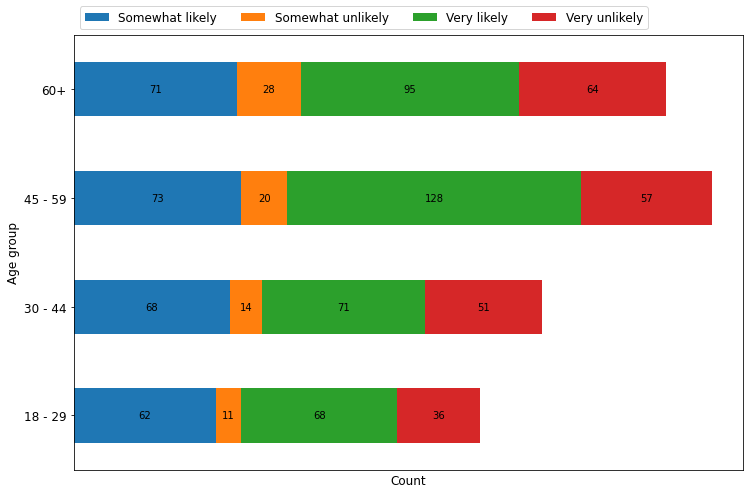

In [10]:
ax = df.plot.barh(stacked=True,figsize=(12,8)) 
ax.set_ylabel('Age group',fontsize = 12)
ax.set_xlabel('Count',fontsize = 12)
ax.set_xticks([])
df_total = df['Somewhat likely']+ df['Somewhat unlikely']+df['Very likely']+df['Very unlikely']
df0 = df[df.columns[1:]]
for n in df0: 
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n],df[n], df0[n])):
        ax.text(cs -ab/2, i, pc,  va = 'center', ha = 'center')
ax.set_yticks(np.arange(4))
ax.set_yticklabels(['18 - 29','30 - 44','45 - 59', '60+'],fontsize = 12)
ax.legend(ncol=len(df), bbox_to_anchor=(0, 1),loc='lower left', fontsize=12) ;

### MATLAB-like pyplot interface

#### Chart 1: each row sums up to 100%

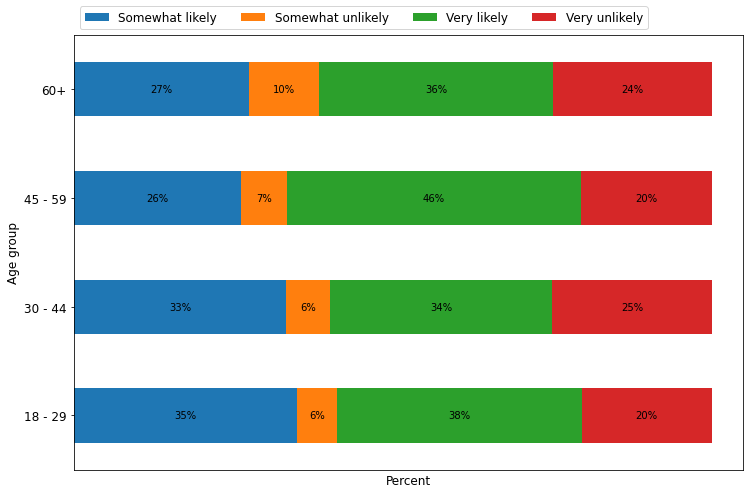

In [11]:
ax = df1.plot.barh(stacked=True,figsize=(12,8)) 
plt.ylabel('Age group',fontsize = 12)
plt.xlabel('Percent',fontsize = 12)
plt.xticks([])
df_total = df['Somewhat likely']+ df['Somewhat unlikely']+df['Very likely']+df['Very unlikely']
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(str(int(width))+ '%', xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.yticks(np.arange(4),['18 - 29','30 - 44','45 - 59', '60+'],fontsize = 12)
plt.legend(ncol=len(df), bbox_to_anchor=(0, 1),loc='lower left', fontsize=12) ;

#### Chart 2: absolute values, that do not sum up to 100%

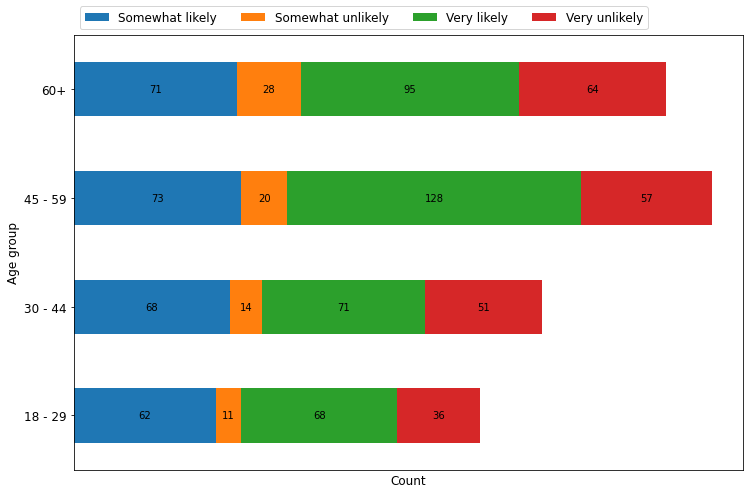

In [12]:
df.plot.barh(stacked=True,figsize=(12,8)) 
plt.ylabel('Age group',fontsize = 12)
plt.xlabel('Count',fontsize = 12)
plt.xticks([])
df0 = df[df.columns[1:]]
for n in df0: 
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n],df[n], df0[n])):
        plt.text(cs - ab/2, i, pc,  va = 'center', ha = 'center')
plt.yticks(np.arange(4),['18 - 29','30 - 44','45 - 59', '60+'],fontsize = 12)
plt.legend(ncol=len(df), bbox_to_anchor=(0, 1),loc='lower left', fontsize=12);

### Two plots and their description

''

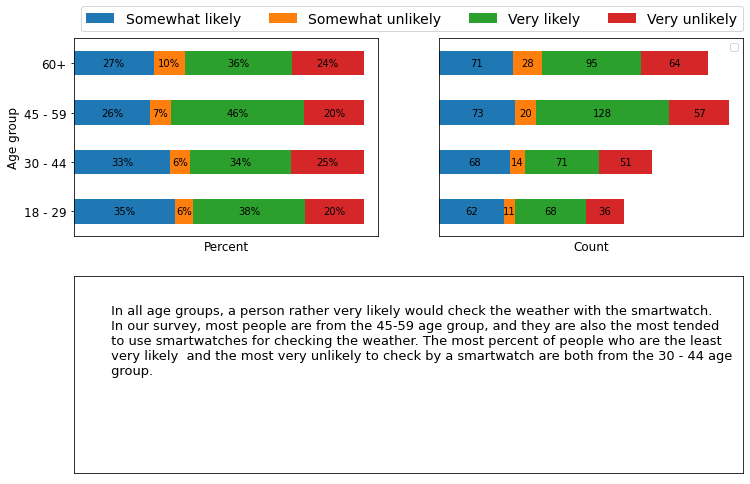

In [13]:
fig = plt.figure()

plt.subplot(212)
plt.xticks([]) 
plt.yticks([])
plt.subplot(212).text(0.05, 0.5, ' In all age groups, a person rather very likely would check the weather with the smartwatch.\n In our survey, most people are from the 45-59 age group, and they are also the most tended \n to use smartwatches for checking the weather. The most percent of people who are the least \n very likely  and the most very unlikely to check by a smartwatch are both from the 30 - 44 age \n group.',
                     fontsize = 13)


plt.subplot(221)
ax = df1.plot.barh(stacked=True,figsize=(12,8),ax=plt.gca()) 
plt.ylabel('Age group',fontsize = 12)
plt.xlabel('Percent',fontsize = 12)
plt.xticks([])
df_total = df['Somewhat likely']+ df['Somewhat unlikely']+df['Very likely']+df['Very unlikely']
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(str(int(width))+ '%', xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.yticks(np.arange(4),['18 - 29','30 - 44','45 - 59', '60+'],fontsize = 12)
plt.legend(ncol=len(df), bbox_to_anchor=(0, 1),loc='lower left', fontsize=14)
 

plt.subplot(222)
df.plot.barh(stacked=True,figsize=(12,8),ax=plt.gca()) 
plt.ylabel('')
plt.xlabel('Count',fontsize = 12)
plt.xticks([])
plt.yticks([])
df0 = df[df.columns[1:]]
for n in df0: 
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n],df[n], df0[n])):
        plt.text(cs - ab/2, i, pc,  va = 'center', ha = 'center')
plt.legend([])
;